In [1]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Classifying Patients ##

In [2]:
ckd = Table.read_table('data/ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


In [3]:
ckd.group('Class')

# what does this mean and how does it affect how good my classifications will be
# for new patients?

# how does my existing ckd table and the type of patients and outcomes stored
# then affect how well i'm going to classify new patients?



Class,count
0,115
1,43


In [6]:
ckd.where('Class', 0)


Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
40,80,1.025,0,0,normal,normal,notpresent,notpresent,140,10,1.2,135,5,15,48,10400,4.5,no,no,no,good,no,no,0
23,80,1.025,0,0,normal,normal,notpresent,notpresent,70,36,1,150,4.6,17,52,9800,5,no,no,no,good,no,no,0
45,80,1.025,0,0,normal,normal,notpresent,notpresent,82,49,0.6,147,4.4,15.9,46,9100,4.7,no,no,no,good,no,no,0
57,80,1.025,0,0,normal,normal,notpresent,notpresent,119,17,1.2,135,4.7,15.4,42,6200,6.2,no,no,no,good,no,no,0
51,60,1.025,0,0,normal,normal,notpresent,notpresent,99,38,0.8,135,3.7,13,49,8300,5.2,no,no,no,good,no,no,0
34,80,1.025,0,0,normal,normal,notpresent,notpresent,121,27,1.2,144,3.9,13.6,52,9200,6.3,no,no,no,good,no,no,0
60,80,1.025,0,0,normal,normal,notpresent,notpresent,131,10,0.5,146,5,14.5,41,10700,5.1,no,no,no,good,no,no,0
38,60,1.02,0,0,normal,normal,notpresent,notpresent,91,36,0.7,135,3.7,14,46,9100,5.8,no,no,no,good,no,no,0
42,80,1.02,0,0,normal,normal,notpresent,notpresent,98,20,0.5,140,3.5,13.9,44,8400,5.5,no,no,no,good,no,no,0
35,80,1.02,0,0,normal,normal,notpresent,notpresent,104,31,1.2,135,5,16.1,45,4300,5.2,no,no,no,good,no,no,0


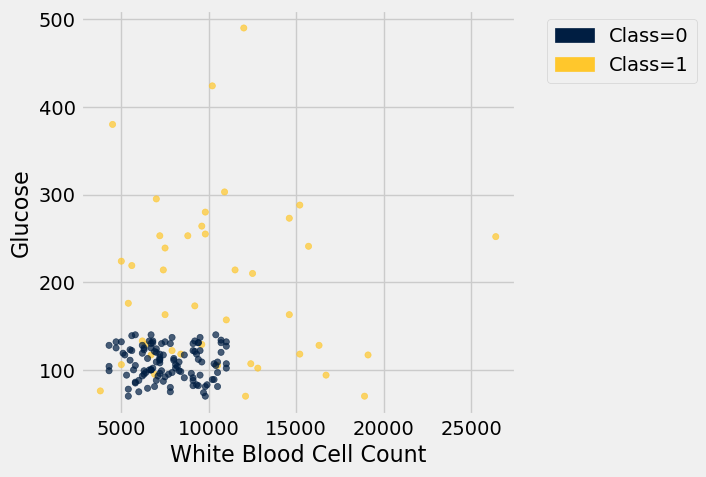

In [5]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Class') 
# changed from colors = "Class"

# class = 0 no CKD
# class = 1 has CKD

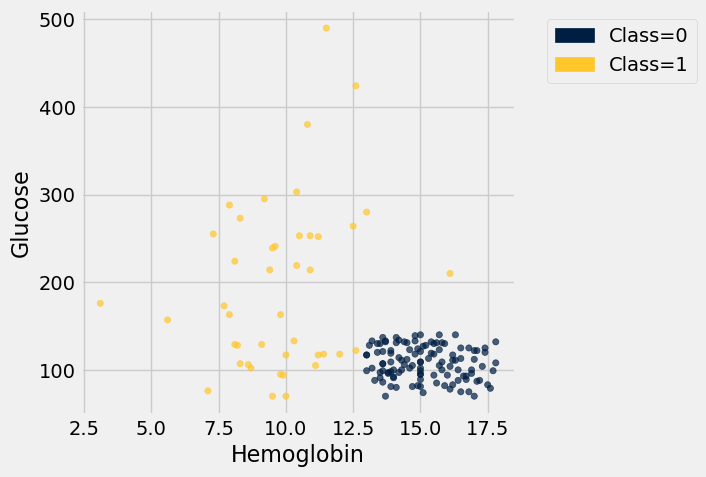

In [8]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')

In [10]:
# we want to be able to way to predict the class of someone
# without having to plot & eye ball this graph every time.
#
# one way to do this is to put some thresholds into code

# horizontal threshold: max glucose for patients WITHOUT CKD:
max_glucose_for_0 = ckd.where('Class',are.equal_to(0)).column('Glucose').max()

# vertical threshold: min hemoglobin for patients WITHOUT CKD:
min_hemoglobin_for_0 = ckd.where('Class',are.equal_to(0)).column('Hemoglobin').min()
(max_glucose_for_0,min_hemoglobin_for_0)

(140, 13.0)

In [11]:
def classify(hemoglobin, glucose):
    if hemoglobin < min_hemoglobin_for_0 or glucose > max_glucose_for_0:
        return 1 # class = 1, has CKD
    else:
        return 0 # class = 0, no CKD

In [12]:
# Let's try our classifier!
classify(15, 100)

0

In [13]:
classify(10, 300)

1

In [ ]:
# caveat: this doesn't then mean we can 100% diagnose accurately whether someone 
#has CKD or not. this classify function is entirely based off of our sample data


## Classifying Banknotes ##

In [14]:
banknotes = Table.read_table('data/banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


In [15]:
banknotes.group('Class')

Class,count
0,762
1,610


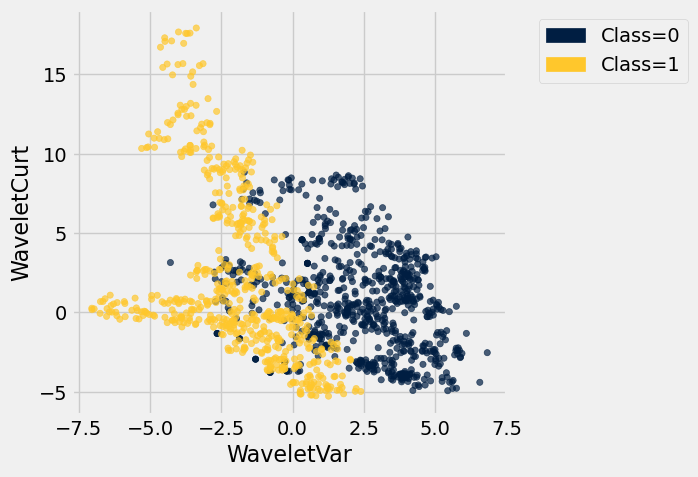

In [17]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')

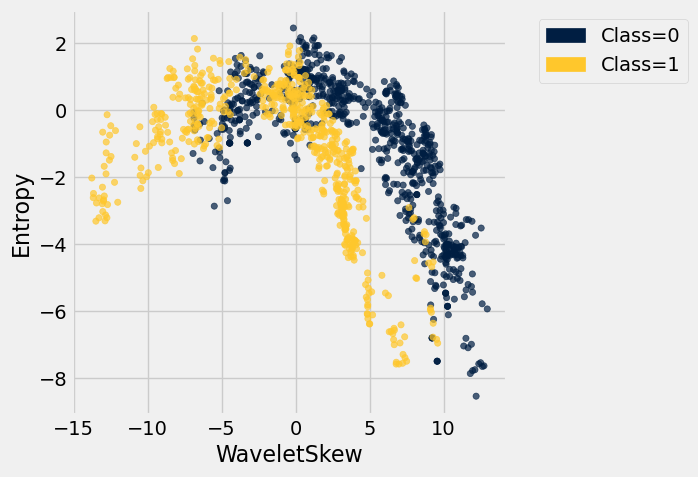

In [18]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Class')

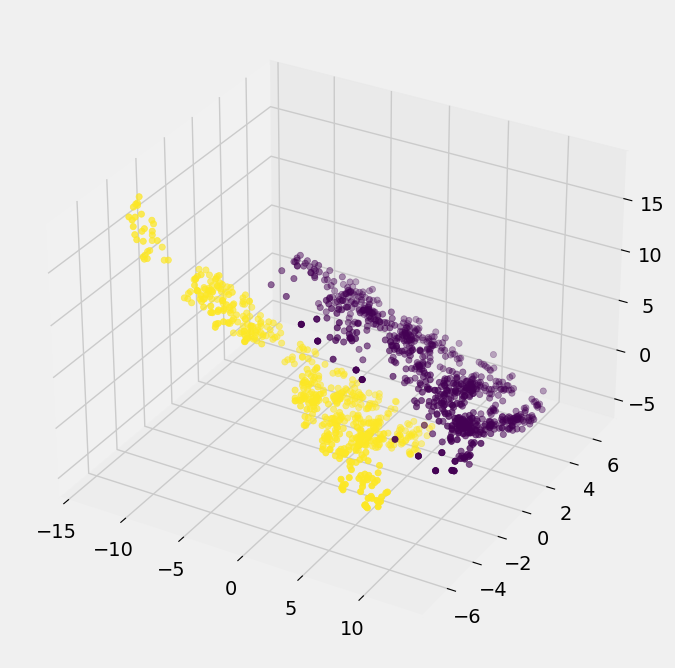

In [23]:
ax = plots.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'));